In [1]:
using DataFrames
using CSV
using Plots
using Images
using StatsPlots

In [45]:
key = "head"

folder_path = joinpath(@__DIR__, "export", key)
data_480_640 = CSV.read(joinpath(folder_path, "export_data.csv"), DataFrame)

sx = repeat(["RSE", "SDM"], inner = 3)
nam = repeat(["240×320", "360×480", "480×640"], outer = 2)

data = filter(x -> x.Method == "sdm_data_zoom" || x.Method == "rse_data_zoom", data_480_640)

,Method,Dims,S,Dx,Dy,SSI,SMPI,ENL
,String,String,Int64,Int64,Int64,Float64,Float64,Float64
1,rse_data_zoom,240_320,70,80,140,0.65859,0.582469,0.957923
2,rse_data_zoom,360_480,70,130,60,0.683841,0.589787,0.888486
3,rse_data_zoom,480_640,70,50,100,0.722435,0.622389,0.796093
4,sdm_data_zoom,240_320,70,80,140,0.744137,0.809172,0.750335
5,sdm_data_zoom,360_480,70,130,60,0.775741,0.812317,0.690444
6,sdm_data_zoom,480_640,70,50,100,0.810592,0.835592,0.632348


In [9]:
theme(:ggplot2)
pgfplotsx()

Plots.PGFPlotsXBackend()

## Find the color you want to use

In [21]:
using ColorSchemes
using Colors

LoadError: ArgumentError: Package ColorSchemes not found in current path:
- Run `import Pkg; Pkg.add("ColorSchemes")` to install the ColorSchemes package.


In [47]:
ColorSchemes.rainbow

In [89]:
#color = [ColorSchemes.rainbow[2], ColorSchemes.rainbow[6]]

In [28]:
cgradients()

LoadError: UndefVarError: cgradients not defined

In [7]:
color = [cgrad(:pu_or)[1], cgrad(:pu_or)[3]]

## Ploting

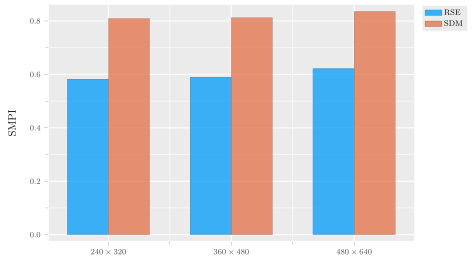

In [46]:
p_ENL = groupedbar(nam, data.ENL, group = sx, ylabel = "ENL",
    fillalpha = 0.75, legend = false,
    bar_width = 0.67, lw = 0, tex_output_standalone = true)

p_SSI = groupedbar(nam, data.SSI, group = sx, ylabel = "SSI",
    fillalpha = 0.75, legend = false,
    bar_width = 0.67, lw = 0, tex_output_standalone = true)

p_SMPI = groupedbar(nam, data.SMPI, group = sx, ylabel = "SMPI",
    fillalpha = 0.75,
    bar_width = 0.67, lw = 0, tex_output_standalone = true)

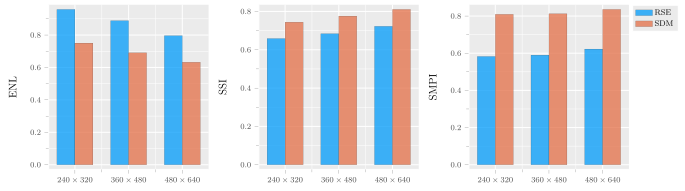

In [47]:
p = plot(p_ENL, p_SSI, p_SMPI, layout=(1, 3), size=(900, 300), tex_output_standalone = true)

In [48]:
saving_path = joinpath(@__DIR__, "Plot")
savefig(p, joinpath(saving_path, "Bar_$key.tex"))

## 论文第五章的`bar plot`

In [26]:
key = "head"

folder_path = joinpath(@__DIR__, "export", key)
data_480_640 = CSV.read(joinpath(folder_path, "export_data.csv"), DataFrame)

sx = repeat(["SDM", "LDR", "RSE"], inner = 4)
nam = repeat(["SSI", "SMPI", "ENL", "Time"], outer = 3)

data = filter(x -> x.Dims == "480_640" && occursin("zoom", x.Method), data_480_640)

,Method,Dims,S,Dx,Dy,SSI,SMPI,ENL
,String,String,Int64,Int64,Int64,Float64,Float64,Float64
1,ldr_data_zoom,480_640,70,50,100,0.776189,0.780943,0.689646
2,rse_data_zoom,480_640,70,50,100,0.722435,0.622389,0.796093
3,sdm_data_zoom,480_640,70,50,100,0.810592,0.835592,0.632348


In [27]:
if key == "tail"
    y = [Array(data[3, 6:8]); 1.290; Array(data[1, 6:8]); 0.473; Array(data[2, 6:8]); 1.867]
else
    y = [Array(data[3, 6:8]); 1.291; Array(data[1, 6:8]); 0.477; Array(data[2, 6:8]); 1.878]
end

12-element Vector{Float64}:
 0.810592190174469
 0.8355919936365371
 0.632348468786184
 1.291
 0.7761891462369882
 0.780942822533655
 0.6896459187455989
 0.477
 0.7224351563229309
 0.6223885893019083
 0.7960925453245186
 1.878

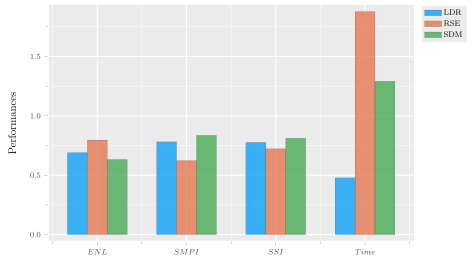

In [28]:
p1 = groupedbar(nam, y, group = sx, ylabel = "Performances",
    fillalpha = 0.75,
    bar_width = 0.67, lw = 0, tex_output_standalone = true)

In [29]:
saving_path = joinpath(@__DIR__, "Plot")
savefig(p1, joinpath(saving_path, "Chp5_Bar_$key.tex"))